In [1]:
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


## Rading and Modifying data files

In [2]:
# .set_option() changes behavior globaly in Jupyter Notebooks, so it is not a temporary fix.

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

#Or to almost completely suppress scientific notation without losing precision, try this:
#pd.set_option('display.float_format', str)

#### Drug_Data

In [34]:
df=  pd.read_csv(r"C:\Users\IMBS\Downloads\programming\data_science_drug\Healthcare_dataset.csv")

In [35]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [5]:
df.shape

(3424, 69)

## Data Manupulation

#### Unique type of each column

In [ ]:
for column in df.columns:
    print(column,(df[column].unique()))

In [ ]:
print(df.dtypes.head(30))

In [ ]:
for column in df.columns:
                print(type(df.loc[1,column]))


In [ ]:
df['Tscore_Bucket_During_Rx']

In [ ]:
df[df['Tscore_Bucket_During_Rx'].str.contains("Unknown")]

In [ ]:
print(df['Tscore_Bucket_During_Rx'].isnull())

In [ ]:
df['Race'].fillna('Na')

In [ ]:
df.Tscore_Bucket_During_Rx = pd.factorize(df.Tscore_Bucket_During_Rx, na_sentinel=-2)[0] + 1

In [ ]:
df["Tscore_Bucket_During_Rx"]

In [ ]:
df.Tscore_Bucket_During_Rx.replace(-1, np.nan).interpolate().astype(int)

In [ ]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
for column in df.columns:
    df_max = df.groupby(column).idxmax()  
df_max    

#### Separating Persistent and Non Persistent

In [ ]:
df_Persistent = df[df['Persistency_Flag'] == 'Persistent']
df_Non_Persistent = df[df['Persistency_Flag'] == 'Non-Persistent']

In [ ]:
len(df_Persistent.iloc[:,1])

In [ ]:
len(df_Non_Persistent.iloc[:,1])

In [ ]:
df_Persistent

In [ ]:
df_Non_Persistent

In [ ]:
df_Male = df[df['Gender'] == 'Male']
df_Female = df[df['Gender'] == 'Female']

In [ ]:
len(df_Male)

In [ ]:
len(df_Female)

In [ ]:
df_Female.count()

In [ ]:
risk_region = df.groupby(['Region']).agg({'Count_Of_Risks':'mean'}).reset_index()
risk_region

In [ ]:
risk_region = df.groupby(['Gender']).agg({'Count_Of_Risks':'mean'}).reset_index()
risk_region

In [ ]:
risk_region = df.groupby(['Persistency_Flag']).agg({'Count_Of_Risks':'mean'}).reset_index()
risk_region

# Dealing with missing values

### Initially, it seems there is no missing values, but ...

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 69 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
df.Dexa_Freq_During_Rx.unique()

array([  0,   2,   7,   3,   5,  20,  13,   1,   6,  12,   4,  10,  25,
        11,  18,  21,  15,  28,  22,  37,  14,   8,   9,  17,  81,  42,
        16,  30,  19,  45,  27,  24,  58,  26,  23,  33, 110,  36,  34,
        88,  66,  32, 118,  48,  69,  38,  40,  68,  52,  50, 146,  44,
        35,  39, 108,  54,  72,  29], dtype=int64)

In [10]:
df.Dexa_Freq_During_Rx.isnull().sum()

0

### But if we convert unknown variables as missing values, there are lots of missed values

In [11]:
new_df = df.Risk_Segment_During_Rx.str.split(expand=True).stack().value_counts().reset_index()

new_df.columns = ['Word', 'Frequency'] 

new_df

,Word,Frequency
0,Unknown,1497
1,HR_VHR,965
2,VLR_LR,962


## Method 1, Dropping columns or rows including missing values:


### Dropping columns with more than 30% missing values

In [12]:
list_column_with_nulls = []

for column in df.columns:
    n_missed = len(df[df.loc[:,column]=='Other/Unknown'])+ len(df[df.loc[:,column]=='Unknown'])
    percent = n_missed/3424
    if percent > 0.3:
        print(column)
        print("percentage of missing values :", round(percent, 2))
        list_column_with_nulls.append(column)

Risk_Segment_During_Rx
percentage of missing values : 0.44
Tscore_Bucket_During_Rx
percentage of missing values : 0.44
Change_T_Score
percentage of missing values : 0.44
Change_Risk_Segment
percentage of missing values : 0.65


In [13]:
len(list_column_with_nulls)

4

#### Dropping list_column_with_nulls

In [14]:
df.drop([col for col in list_column_with_nulls], axis=1, inplace=True)

### Dropping rows with more than 2% missing values

In [15]:
rows_with_missing_values = []
for i in range(len(df)) :
    n=0
    s = []
    for j in df.columns:
        if (df.loc[i,j]=='Other/Unknown') | (df.loc[i,j]=='Unknown'):
            n=n+1
            s.append(j)
    if (n/69 > 0.02):
        print('row :',i, '    number of missing values :', n)
        print('Columns including missing values :',s)
        rows_with_missing_values.append(i)

row : 154     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 218     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 221     number of missing values : 2
Columns including missing values : ['Race', 'Ntm_Speciality']
row : 406     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 822     number of missing values : 2
Columns including missing values : ['Race', 'Region']
row : 950     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 952     number of missing values : 2
Columns including missing values : ['Ethnicity', 'Ntm_Speciality']
row : 1236     number of missing values : 2
Columns including missing values : ['Ethnicity', 'Ntm_Speciality']
row : 1285     number of missing values : 2
Columns including missing values : ['Race', 'Ethnicity']
row : 1288     number of missing values : 3
Columns including missing values

#### Dropping rows_with_missing_values

In [17]:
df = df[~df.index.isin(rows_with_missing_values)]

In [18]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [19]:
df.shape

(3379, 65)

## Method 2, Imputation method for categorical columns:


#### Defining Unknown and Other/Unknown as null for pandas

In [21]:
for column in df.columns:
     if(type(df.loc[1,column]) ==str):
            df[column] = df[column].replace({'Unknown': np.nan})
            df[column] = df[column].replace({'Other/Unknown': np.nan})            

<ipython-input-21-18e3f391e858>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({'Unknown': np.nan})
<ipython-input-21-18e3f391e858>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace({'Other/Unknown': np.nan})


#### Number of nulls in each column

In [22]:
n_null = df.isnull().sum(axis = 0)
n_null.head(60)

Ptid                                                                    0
Persistency_Flag                                                        0
Gender                                                                  0
Race                                                                   64
Ethnicity                                                              58
Region                                                                 55
Age_Bucket                                                              0
Ntm_Speciality                                                        290
Ntm_Specialist_Flag                                                     0
Ntm_Speciality_Bucket                                                   0
Gluco_Record_Prior_Ntm                                                  0
Gluco_Record_During_Rx                                                  0
Dexa_Freq_During_Rx                                                     0
Dexa_During_Rx                        

#### Filling nulls of each column with the most frequent (mode) of each column

In [23]:
df = df.fillna(df.mode().iloc[0])

#### Any null in data?

In [24]:
df.isnull().values.any()

False

## Method 3, predicting The Missing Values

In [36]:
df=  pd.read_csv(r"C:\Users\IMBS\Downloads\programming\data_science_drug\Healthcare_dataset.csv")

#### Finding columns with more than 0.3 missed values and defining their missed values as nan

In [37]:
Data_with_nulls = []

for column in df.columns:
    n_missed = len(df[df.loc[:,column]=='Other/Unknown'])+ len(df[df.loc[:,column]=='Unknown'])
    percent = n_missed/3424
    if percent > 0.3:
        Data_with_nulls.append(column)

In [38]:
for column in Data_with_nulls:
     if(type(df.loc[1,column]) ==str):
            df[column] = df[column].replace({'Unknown': np.nan})
            df[column] = df[column].replace({'Other/Unknown': np.nan})         

#### Removing columns with more than 0.3 missed values and just adding one of them as target value

In [39]:
data_without_null_1 = df.drop([col for col in Data_with_nulls], axis=1)

In [41]:
data_without_null_1['Risk_Segment_During_Rx']=df['Risk_Segment_During_Rx']

#### Converting data type to digit

In [42]:

for column in data_without_null_1.columns:
        data_without_null_1.loc[:,column] = pd.factorize(data_without_null_1.loc[:,column], na_sentinel=-2)[0] + 1

In [43]:
data_without_null_1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2
4,5,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3420,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,1,1,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,-1
3420,3421,1,2,1,1,3,1,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
3421,3422,1,2,1,1,3,1,3,2,2,1,1,3,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,2,2,1,2,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,2
3422,3423,2,2,1,1,3,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1


#### Replacing '-1' values with 'nan' for the last column

In [44]:
for i in range(len(data_without_null_1)) :
    if ((data_without_null_1['Risk_Segment_During_Rx'].iloc[i])== -1):
        (data_without_null_1['Risk_Segment_During_Rx'].iloc[i]) = np.NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [45]:
data_without_null_1

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Risk_Segment_During_Rx
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.00
1,2,2,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan
2,3,2,2,3,2,2,3,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,2.00
3,4,2,2,1,1,2,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,2,1,1,2,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,2.00
4,5,2,2,1,1,2,1,1,1,1,2,2,1,1,1,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3420,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,1,1,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,nan
3420,3421,1,2,1,1,3,1,2,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan
3421,3422,1,2,1,1,3,1,3,2,2,1,1,3,2,1,1,1,1,1,2,1,2,2,2,2,2,2,1,2,2,1,2,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,3,2.00
3422,3423,2,2,1,1,3,2,2,1,1,1,1,1,1,1,2,1,1,1,2,1,2,2,2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,nan


#### Removing rows including null in last column

In [46]:
Data_without_nulls = data_without_null_1.dropna(axis=0)

In [ ]:
Data_without_nulls

### Making the model for predicting missing values

In [47]:
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = Data_without_nulls.iloc[:,:-1]
y = Data_without_nulls.iloc[:,-1]
# define the model
model = LinearDiscriminantAnalysis()
model.fit(X,y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.926


#### Predicting the last column using the model

In [48]:
data_ =[]
data_ =pd.DataFrame(data_)
data_ = pd.DataFrame(model.predict(data_without_null_1.iloc[:,:-1]))

#### Replacing predicted values just for missed values 

In [49]:
for i in range(len(data_without_null_1)) :
    if(pd.isnull(data_without_null_1.loc[i,'Risk_Segment_During_Rx'])):
          data_without_null_1.loc[i,'Risk_Segment_During_Rx']= data_.iloc[i,0]

#### Finally, there is no missed values

In [50]:
data_without_null_1.apply(lambda x: sum(x.isnull()),axis=0)

Ptid                        0
Persistency_Flag            0
Gender                      0
Race                        0
Ethnicity                   0
                           ..
Risk_Estrogen_Deficiency    0
Risk_Immobilization         0
Risk_Recurring_Falls        0
Count_Of_Risks              0
Risk_Segment_During_Rx      0
Length: 66, dtype: int64

In [ ]:
data_without_null_1

# Machine learning, clasification models

## Random Forests

In [53]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(RF, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy of the model is: %.3f' % result.mean())

Accuracy of the model is: 0.897


In [104]:
yhat_RF = RF.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_RF == 1:
    print('The patient is predicted to not have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

The patient is predicted to not have drug persistence.


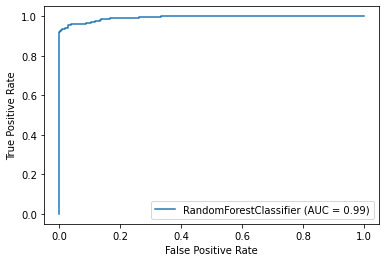

In [69]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

RF.fit(X, y)

metrics.plot_roc_curve(RF, X_test, y_test)  
plt.show() 

## Logistic Regression

In [72]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

LR = LogisticRegression(random_state=0).fit(X, y)
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.811


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
yhat_LR = LR.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_LR == 1:
    print('The patient is predicted to have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

The patient is predicted to have drug persistence.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

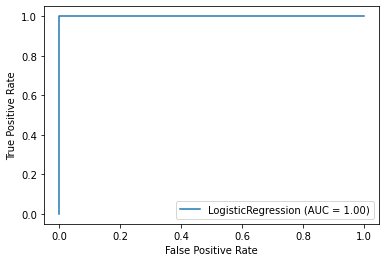

In [80]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
LR = LogisticRegression(random_state=0).fit(X, y)

LR.fit(X, y)

metrics.plot_roc_curve(LR, X_test, y_test)  
plt.show() 

## Neural Networks

In [88]:

import sklearn as sk
from sklearn.neural_network import MLPClassifier

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=9)
# evaluate the model
result = cross_val_score(NN, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.979


In [91]:
yhat_NN = NN.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_NN == 1:
    print('The patient is predicted to not have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

The patient is predicted to not have drug persistence.


## Ensemble Modeling

In [102]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('RF', RF), ('NN', NN), ('LR', LR)], voting='hard')
model.fit(X, y)




The patient is predicted to not have drug persistence.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
yhat_model = model.predict([list(data_without_null_1.iloc[3000,1:])])
if yhat_model == 1:
    print('The patient is predicted to not have drug persistence.' ) 
else:
    print('The patient is predicted to not have drug persistence.')

## Support Vector Machines

In [82]:
import sklearn as sk
from sklearn import svm
import pandas as pd
import os

y = data_without_null_1.iloc[:,1]
X = data_without_null_1.iloc[:,1:]

SVM = svm.LinearSVC()
SVM.fit(X, y)
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(SVM, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Creating and summarizing the dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

In [ ]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

In [ ]:
type(data_without_null_1.iloc[3000,1])